In [1]:
import torch
import torch.nn as nn
import cv2
import albumentations as A

from matplotlib import pyplot as plt

from dataset import *

In [2]:
dataset = WheatDataset('./data/train', './data/train.csv', transforms=None)

In [29]:
random_index = torch.randint(0, len(dataset), (1,)).item()
# img, bboxes, label = dataset[random_index]
img, bboxes, label = dataset[104]
annotations = {'image': img, 'bboxes': bboxes, 'category_id': label}

In [4]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img


def visualize(annotations):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx])
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

def get_aug(aug, min_area=0.15, min_visibility=0.15):
    return A.Compose(aug, bbox_params=A.BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

# Normal image

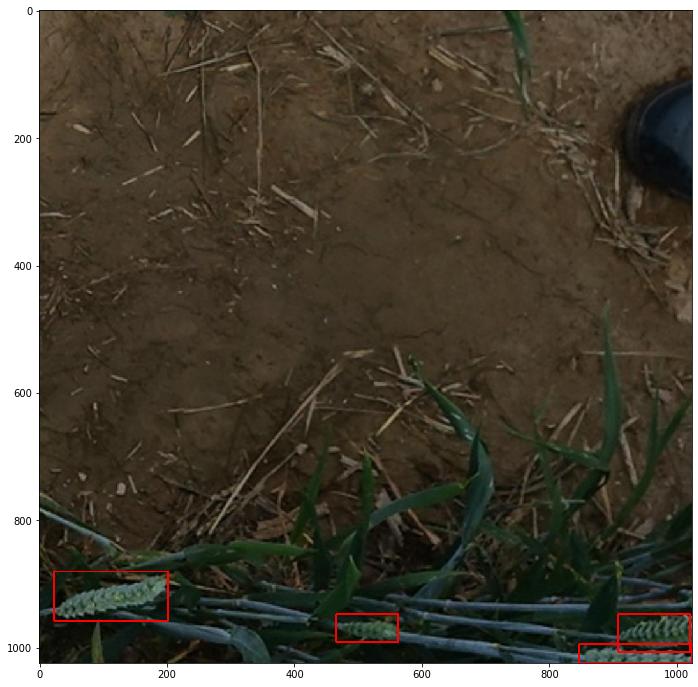

In [32]:
visualize(annotations)

# Augmneations

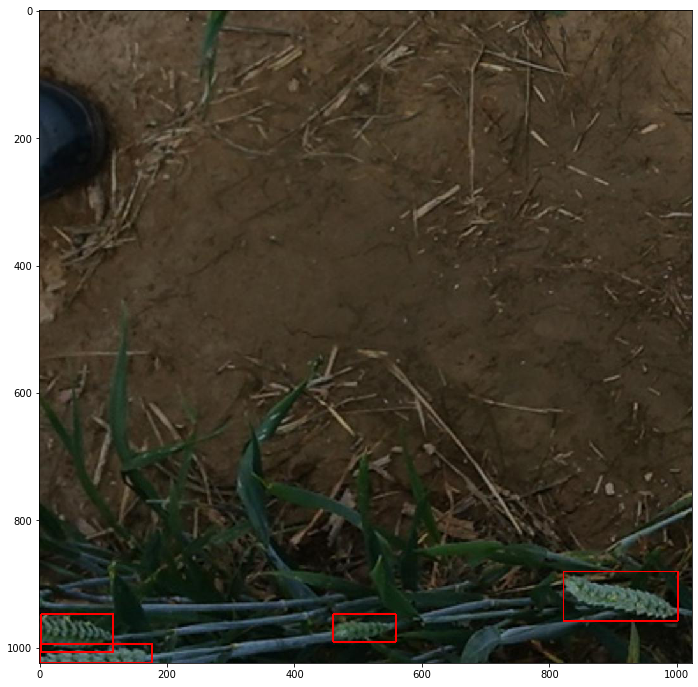

In [33]:
aug = get_aug([A.HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented)

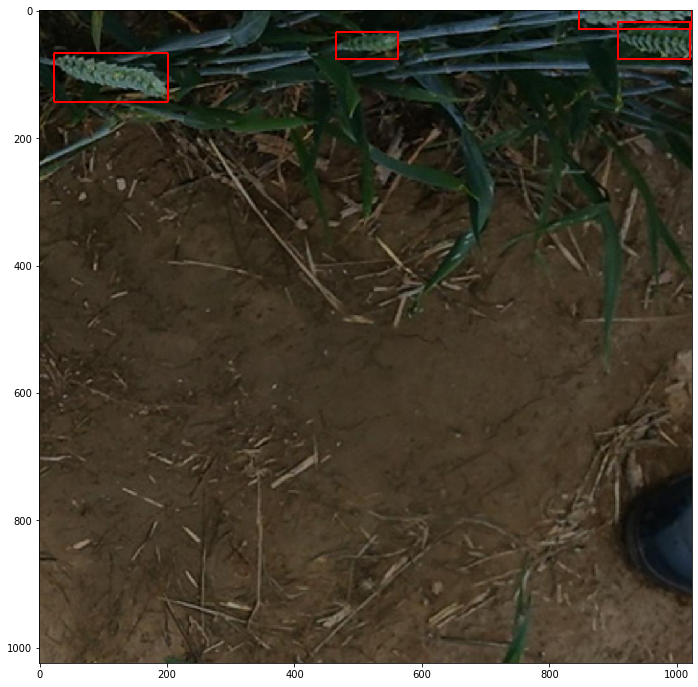

In [34]:
aug = get_aug([A.VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented)

In [35]:
aug = get_aug([A.Rotate(p=1, border_mode=cv2.BORDER_CONSTANT)])
augmented = aug(**annotations)
visualize(augmented)

In [36]:
aug = get_aug([A.RandomSizedCrop((600, 600), 1024, 1024, p=1)])
augmented = aug(**annotations)
visualize(augmented)

In [31]:
aug = get_aug([
    A.VerticalFlip(p=0.5),
    A.Rotate(p=0.5, border_mode=cv2.BORDER_CONSTANT),
    A.RandomSizedCrop((700, 700), 1024, 1024, p=0.5),
    ])
augmented = aug(**annotations)
visualize(augmented)